# Some descriptive statistics on the database

## 1. Univariate statistics

To create the index, we selected a few health variables available in the database. In this notebook, we will compute some descriptive statistics on these variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

First, we import the database that includes health variables and the names of the variables.

In [6]:
data = pd.read_csv("data_02.csv", low_memory=False)

In [7]:
var_names = pd.read_csv("data_names_var_index.csv")

In [8]:
var_names = var_names.drop(index=12).reset_index(drop=True) # We drop the variable RwSTATUS

RwAGEY_B = dict(zip(var_names.columns, ["cont"]+[f"R{wave}AGEY_B" for wave in range(1,15)]))
var_names = var_names.append(RwAGEY_B, ignore_index=True) # We add the age variable, as it is interesting

C:\Users\julie\AppData\Local\Temp\ipykernel_4052\375082379.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  var_names = var_names.append(RwAGEY_B, ignore_index=True) # We add the age variable, as it is interesting


Let us gather the health variables used to create the index.

Categorical variables:

    RwHOMCAR: indicates whether the Respondent reports any home health care in the reference period. '1' for 'yes', '0' for 'no'.

    RwHIBP: indicates whether the Respondent presents High blood pressure or hypertension. '1' for 'yes', '0' for 'no'.

    RwCANCR: indicates whether the Respondent presents a cancer of any kind. '1' for 'yes', '0' for 'no'.

    RwLUNG: indicates whether the Respondent presents a chronic lung disease. '1' for 'yes', '0' for 'no'.

    RwDIAB: indicates whether the Respondent presents diabete or high blood sugar. '1' for 'yes', '0' for 'no'.

    RwHEART: indicates whether the Respondent presents heart-related problems. '1' for 'yes', '0' for 'no'.

    RwSTROK: indicates whether the Respondent presents stroke or transient ischemic attack. '1' for 'yes', '0' for 'no'.

    RwPSYCH: indicates whether the Respondent presents emotional, nervous or psychiatric problems. '1' for 'yes', '0' for 'no'.

    RwARTHR: indicates whether the Respondent presents arthritis or rheumatism. '1' for 'yes', '0' for 'no'.

    RwBACK: indicates whether the Respondent reports back problems. '1' for 'yes', '0' for 'no'.

    RwDRINK: indicates whether the Respondent drinks any alcool. '1' for 'yes', '0' for 'no'.

    RwSMOKEN: indicates whether the Respondent smokes any cigarette now. '1' for 'yes', '0' for 'no'.

    RwDEPRES, RwEFFORT, RwSLEEPR, RwWHAPPY, RwFLONE, RwFSAD, RwGOING, and RwENLIFE are yes/no indicators of the Respondent’s feelings much of the time over the week prior to the interview. '1' for 'yes', '0' for 'no'.

    RwVIGACT indicate whether the Respondent participates in vigorous physical activity at least 3 times a week. '1' for 'yes', '0' for 'no'.

    RwSLFMEM: provides a measure of self reported general rating of memory, from 1 being the best to 5 being the worst rating.

Quantitative variables:

    RwHSPTIM: provides the number of overnight stays at the hospital since the last interview.
    RwNRSTIM: provides the number of overnight nursing home stays since the last interview.
    RwDOCTIM: provides the number of doctor visits since the last interview.
    RwBMI: provides Body Mass Index of the respondent.
    RwAGEY_B: provides the age in years of the respondent.

In [10]:
var_names.shape

(27, 15)

In [11]:
health_variables = list(var_names.drop(columns="CAT_CONT").values.flatten())
health_data = data[["HHIDPN"] + health_variables]

In [12]:
quant_health_var = np.array(var_names[var_names["CAT_CONT"] == "cont"].values)
quant_health_var = np.delete(quant_health_var,0,1)

binary_health_var = np.array(var_names[var_names["CAT_CONT"] == "cat"].values)
binary_health_var = np.delete(binary_health_var,0,1)
binary_health_var = np.delete(binary_health_var,12,0) # this variable is not binary

In [13]:
health_data.head()

,HHIDPN,R1HOMCAR,R2HOMCAR,R3HOMCAR,R4HOMCAR,R5HOMCAR,R6HOMCAR,R7HOMCAR,R8HOMCAR,R9HOMCAR,...,R5AGEY_B,R6AGEY_B,R7AGEY_B,R8AGEY_B,R9AGEY_B,R10AGEY_B,R11AGEY_B,R12AGEY_B,R13AGEY_B,R14AGEY_B
0,1010,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,64.0,66.0,68.0,70.0,72.0,74.0,76.0,NaN,NaN,NaN
3,3020,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,61.0,63.0,65.0,67.0,69.0,72.0,73.0,75.0,NaN,NaN
4,10001010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.0,62.0,64.0,66.0,69.0,71.0,72.0,74.0,76.0,NaN


In [14]:
for i in range(len(binary_health_var)):
    print(health_data[binary_health_var[i,:]].describe())

           R1HOMCAR      R2HOMCAR      R3HOMCAR      R4HOMCAR      R5HOMCAR  \
count  12635.000000  19762.000000  17651.000000  20933.000000  19073.000000   
mean       0.011713      0.057180      0.075123      0.075622      0.068316   
std        0.107597      0.232193      0.263598      0.264399      0.252295   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           R6HOMCAR      R7HOMCAR      R8HOMCAR      R9HOMCAR     R10HOMCAR  \
count  17945.000000  19938.000000  18288.000000  17041.000000  21622.000000   
mean       0.073224      0.068262      0.080435      0.087319      0.088475   
std        0.260511      0.252201      0.271973    

            R1HEART       R2HEART       R3HEART       R4HEART       R5HEART  \
count  12652.000000  19632.000000  17986.000000  21371.000000  19570.000000   
mean       0.131679      0.163509      0.302958      0.388564      0.257128   
std        0.338155      0.369838      0.712031      1.063439      0.539423   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      5.000000      6.000000      4.000000   

            R6HEART       R7HEART       R8HEART       R9HEART      R10HEART  \
count  18153.000000  20108.000000  18449.000000  17199.000000  22013.000000   
mean       0.277199      0.266859      0.293024      0.305541      0.257257   
std        0.528555      0.530374      0.567147    

           R1SLFMEM      R2SLFMEM      R3SLFMEM      R4SLFMEM      R5SLFMEM  \
count  11883.000000  18073.000000  16351.000000  19341.000000  17516.000000   
mean       2.436085      2.677530      2.969543      2.880151      2.932804   
std        1.026341      1.030646      0.973623      0.955261      0.927331   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      2.000000      2.000000      2.000000      2.000000   
50%        2.000000      3.000000      3.000000      3.000000      3.000000   
75%        3.000000      3.000000      4.000000      3.000000      4.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

           R6SLFMEM      R7SLFMEM      R8SLFMEM      R9SLFMEM     R10SLFMEM  \
count  16129.000000  18327.000000  17209.000000  16077.000000  20652.000000   
mean       2.959452      2.986032      3.000000      3.007775      2.937391   
std        0.918406      0.967846      0.956152    

           R1GOINGX       R2GOING       R3GOING       R4GOING       R5GOING  \
count  12652.000000  18044.000000  16335.000000  19310.000000  17500.000000   
mean       3.482058      0.212924      0.193511      0.233765      0.222343   
std        0.739104      0.409386      0.395062      0.423235      0.415832   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.000000      0.000000      0.000000      0.000000      0.000000   
75%        4.000000      0.000000      0.000000      0.000000      0.000000   
max        4.000000      1.000000      1.000000      1.000000      1.000000   

            R6GOING       R7GOING       R8GOING       R9GOING      R10GOING  \
count  16103.000000  18247.000000  17167.000000  16051.000000  20576.000000   
mean       0.229647      0.212418      0.215763      0.202729      0.208593   
std        0.420619      0.409031      0.411362    

In [18]:
health_data.drop(columns="HHIDPN").mean()

R1HOMCAR      0.011713
R2HOMCAR      0.057180
R3HOMCAR      0.075123
R4HOMCAR      0.075622
R5HOMCAR      0.068316
               ...    
R10AGEY_B    65.656667
R11AGEY_B    66.846745
R12AGEY_B    67.904251
R13AGEY_B    65.697781
R14AGEY_B    66.990843
Length: 378, dtype: float64

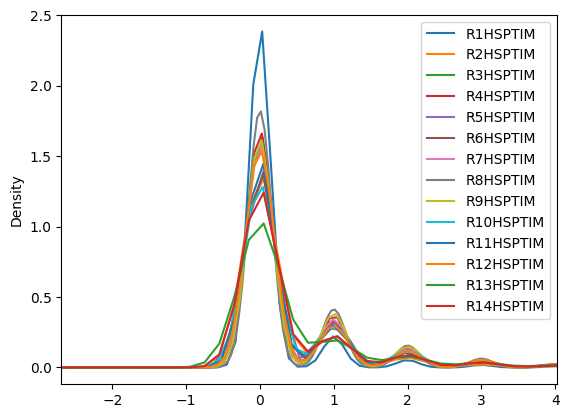

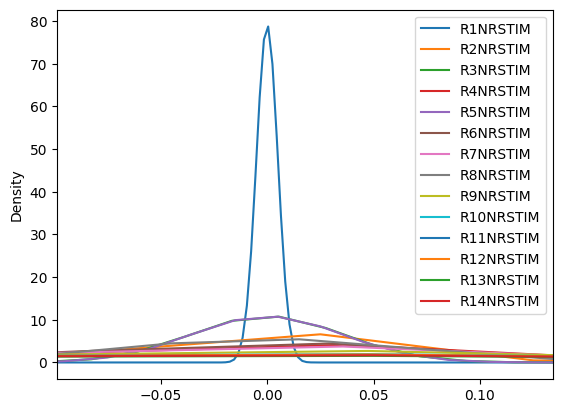

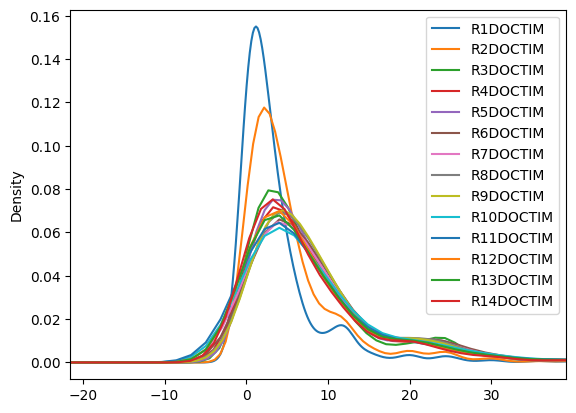

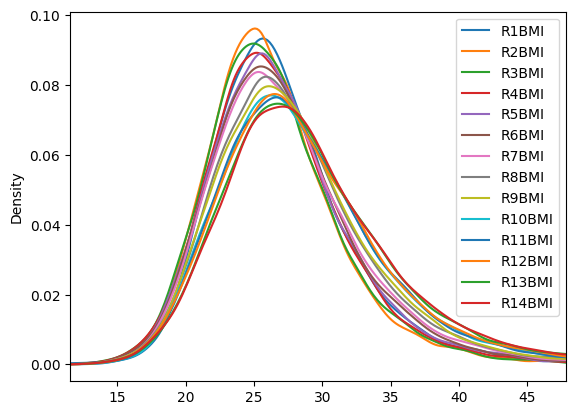

In [15]:
for i in range(len(quant_health_var)-1):
    mean = health_data[quant_health_var[i,0]].mean()
    std = health_data[quant_health_var[i,0]].std()
    health_data[quant_health_var[i,:]].plot.density()
    plt.xlim(mean-3*std,mean+4*std)
    plt.show()

In [19]:
for i in range(1,15):
    print(health_data[f"R{i}BMI"].describe())

count    12652.00000
mean        27.09804
std          5.18020
min         12.80000
25%         23.60000
50%         26.50000
75%         29.60000
max        102.70000
Name: R1BMI, dtype: float64
count    19434.000000
mean        26.452722
std          4.989084
min         12.600000
25%         23.200000
50%         25.800000
75%         29.100000
max         92.200000
Name: R2BMI, dtype: float64
count    17773.000000
mean        26.530721
std          5.108029
min         10.800000
25%         23.100000
50%         25.800000
75%         29.200000
max         75.500000
Name: R3BMI, dtype: float64
count    21099.000000
mean        26.825025
std          5.241683
min          9.600000
25%         23.300000
50%         26.200000
75%         29.500000
max         74.500000
Name: R4BMI, dtype: float64
count    19289.000000
mean        27.038530
std          5.369692
min         11.500000
25%         23.400000
50%         26.400000
75%         29.800000
max         75.500000
Name: R5BMI, dty

For a variable to be interesting in the creation of the index, it needs to be able to differentiate individuals to a certain extent. Formally, the dispersion of the values must be sufficient. We look at the standard deviation of the variables. If it is too close to 0, it means that most individuals have the same value for this variable, and it is not helpful to point out differences.
Regarding the quantitative variables, the distributions show that the standard deviations are satisfying. For example, for the BMI in wave 1, the standard deviation is 5.18, with 75% of values between 12.8 and 29.6.
Regarding the variables NRSTIM, which represents the number of overnight stays in a nursing home, the graph is ambiguous: for wave 1, the standard deviation is very low so the densities for the others waves a flattened. Let's exclude the first wave for this variable:

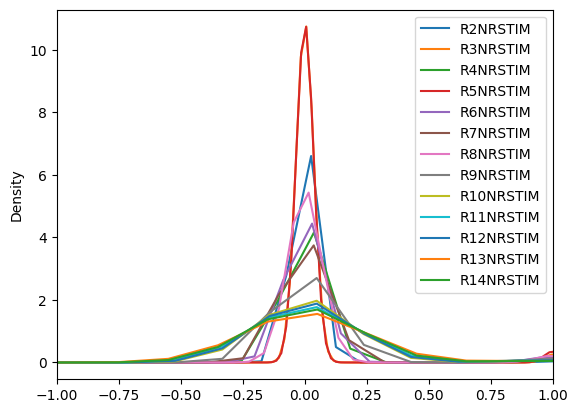

In [21]:
mean = health_data[quant_health_var[1,0]].mean()
std = health_data[quant_health_var[1,0]].std()
health_data[quant_health_var[1,1:]].plot.density()
plt.xlim(-1,1)
plt.show()

When we exclude the first wave, the standard deviations for this variable are more satisfying.

Now let's look at the binary variables: we look at the dispersion of the values, just like with quantitative variables.
In the dataset, categorical variables are not indicated as such, such we define a function to compute the standard deviation of a binary variable with the formula $\sqrt{p(1-p)}$.

In [29]:
def std_binary(variable):
    mean = variable.mean()
    return np.sqrt(mean*(1-mean))

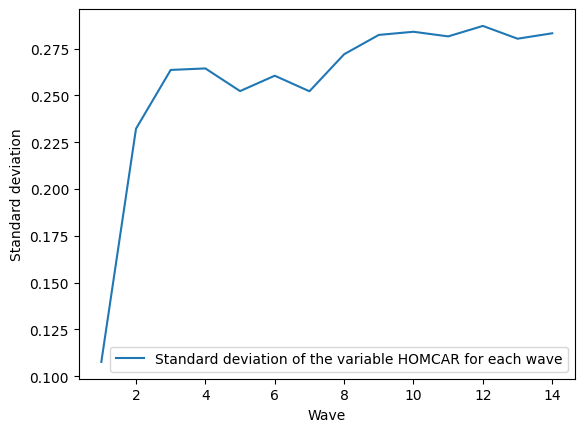

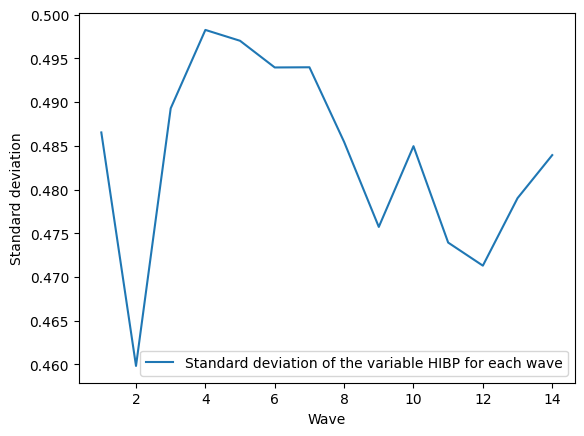

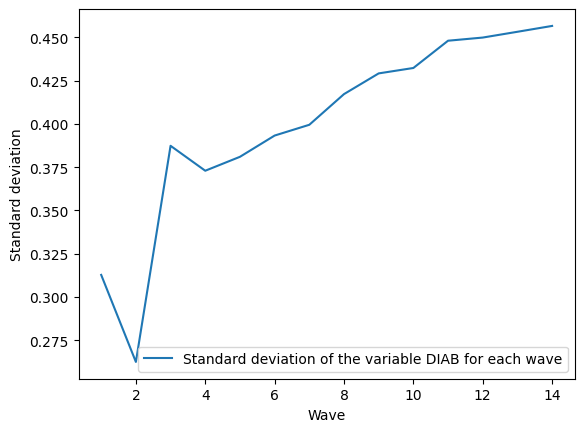

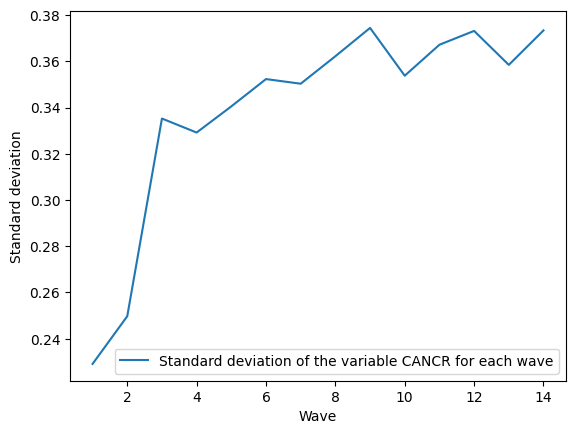

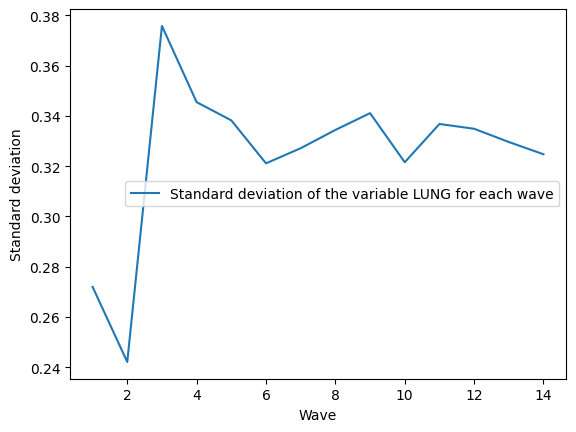

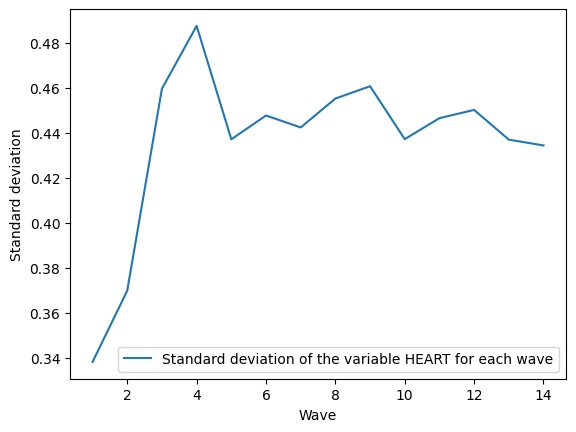

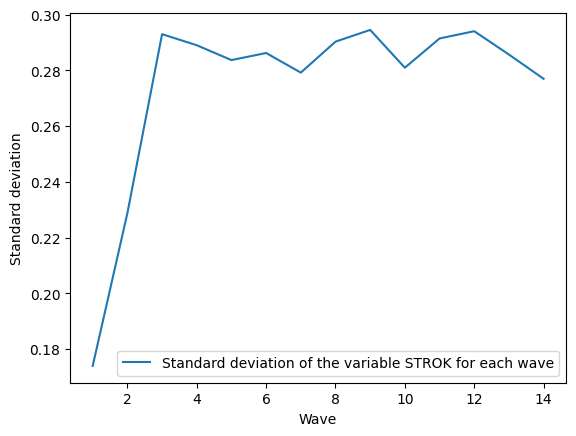

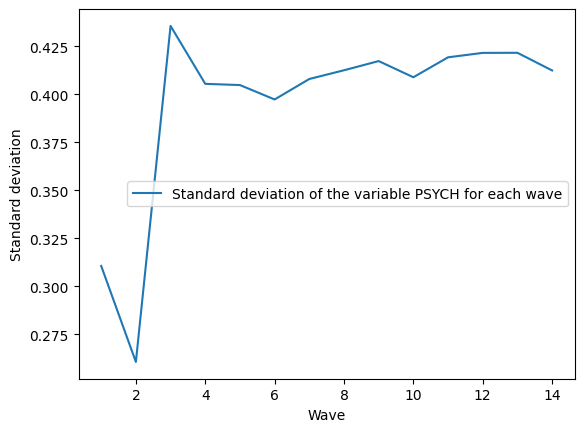

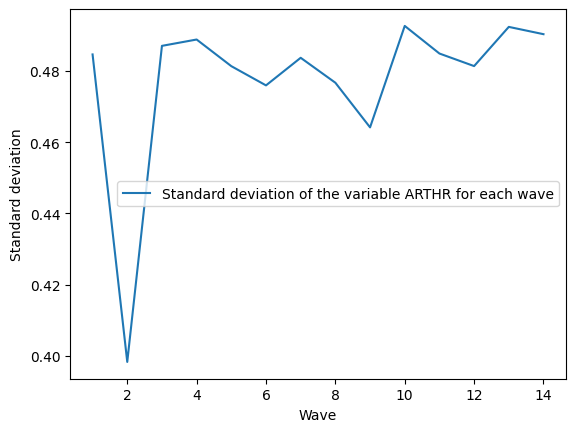

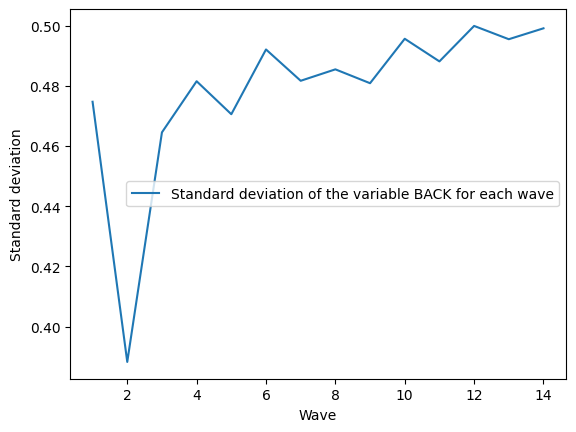

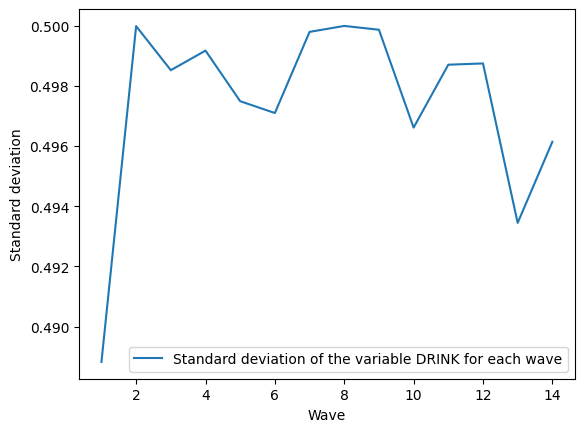

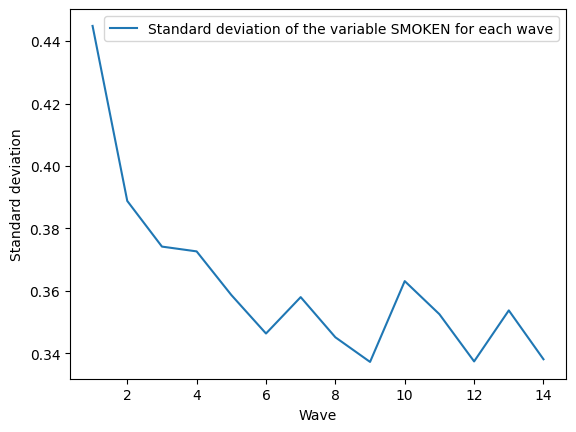

C:\Users\julie\AppData\Local\Temp\ipykernel_4052\1765230529.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mean*(1-mean))


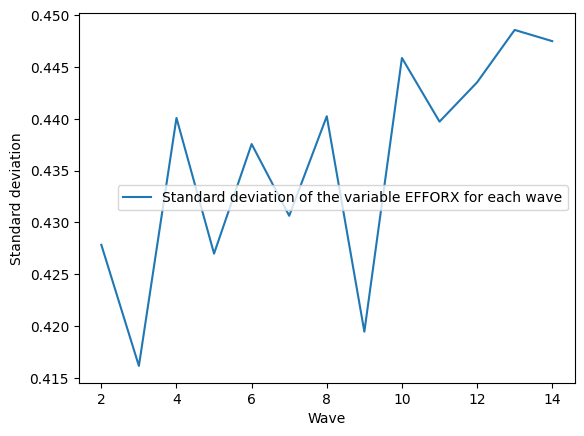

C:\Users\julie\AppData\Local\Temp\ipykernel_4052\1765230529.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mean*(1-mean))


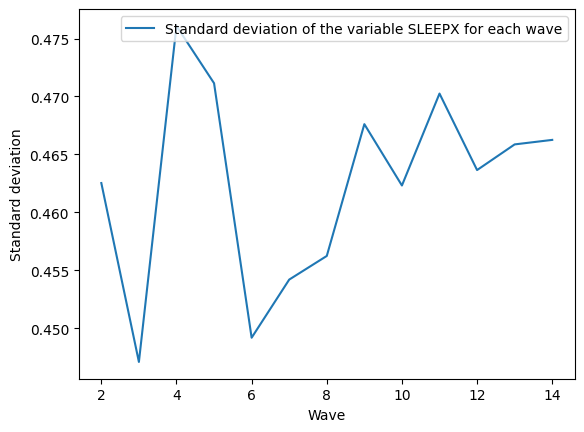

C:\Users\julie\AppData\Local\Temp\ipykernel_4052\1765230529.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mean*(1-mean))


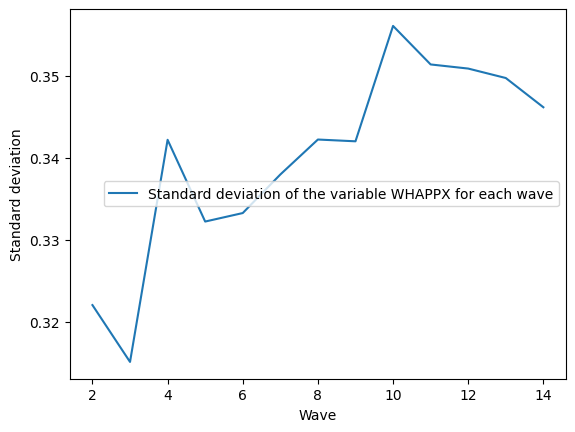

C:\Users\julie\AppData\Local\Temp\ipykernel_4052\1765230529.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mean*(1-mean))


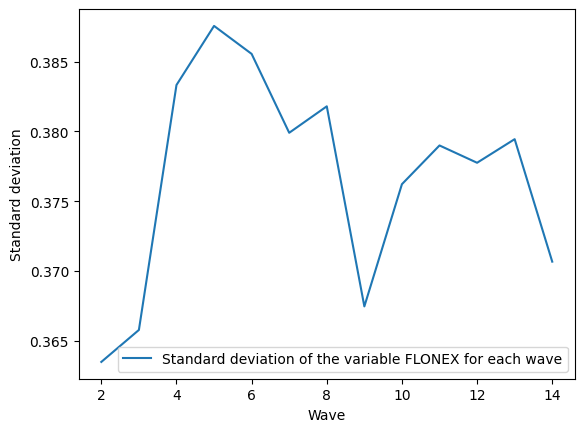

C:\Users\julie\AppData\Local\Temp\ipykernel_4052\1765230529.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mean*(1-mean))


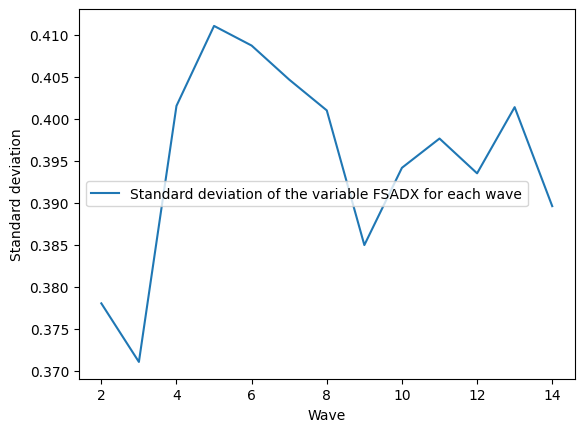

C:\Users\julie\AppData\Local\Temp\ipykernel_4052\1765230529.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mean*(1-mean))


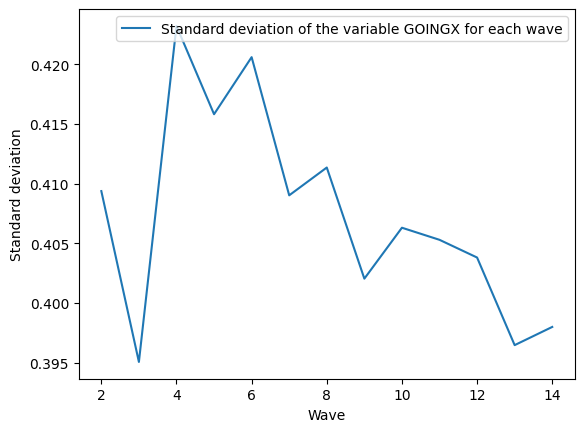

C:\Users\julie\AppData\Local\Temp\ipykernel_4052\1765230529.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mean*(1-mean))


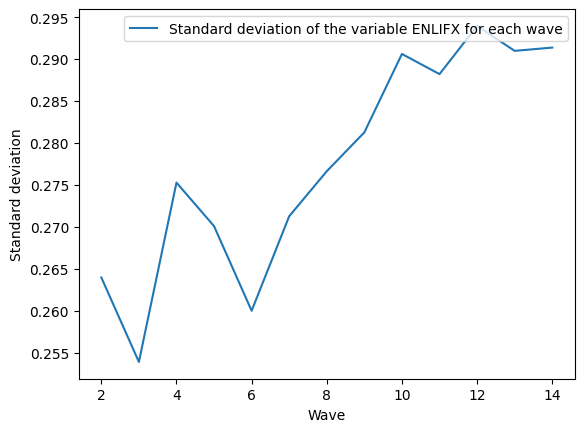

In [34]:
for var in range(len(binary_health_var)-1): #the last variable is not binary
    x = np.arange(1,15)
    std = health_data[binary_health_var[var,:]].apply(std_binary)
    plt.plot(x,std,label="Standard deviation of the variable " + binary_health_var[var,0][2:] + " for each wave")
    plt.xlabel("Wave")
    plt.ylabel("Standard deviation")
    plt.legend()
    plt.show()

The standard deviations are satisfying, considering the fact that values are 0 or 1.

Now let's look at the variable RwSLFMEM which is a rating of the memory.

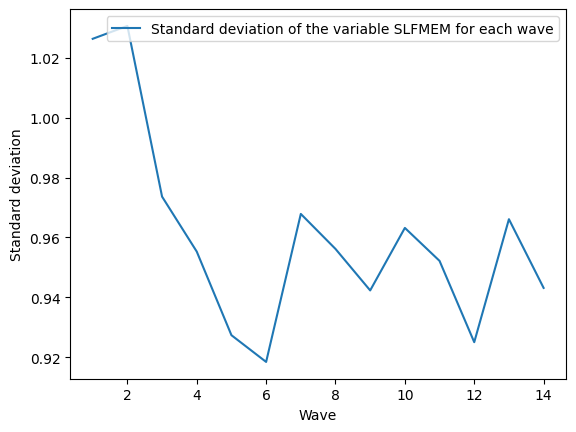

In [35]:
SLFMEM = [f"R{w}SLFMEM" for w in range(1,15)]
x = np.arange(1,15)
std = health_data[SLFMEM].std()
plt.plot(x,std,label="Standard deviation of the variable SLFMEM for each wave")
plt.xlabel("Wave")
plt.ylabel("Standard deviation")
plt.legend()
plt.show()

The standard deviation is satisfying as well.

## 2. Bivariate statistics